In [43]:
!pip install qiskit
!pip install matplotlib



A qubit can be in:
- `|0⟩` → 0 in Z-basis
- `|1⟩` → 1 in Z-basis
- `|+⟩` → 0 in X-basis
- `|−⟩` → 1 in X-basis

**Formulas**:
- **Z-basis**:  

  $$
  |0\rangle = \begin{bmatrix}1 \\ 0\end{bmatrix}, \quad |1\rangle = \begin{bmatrix}0 \\ 1\end{bmatrix}
  $$

- **X-basis**:  

  $$
  |+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}, \quad |-\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}
  $$

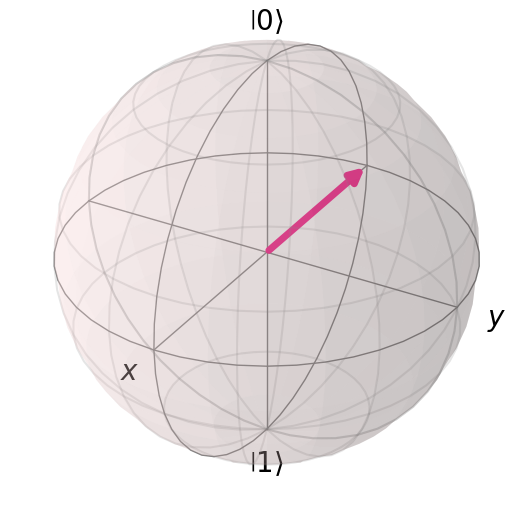

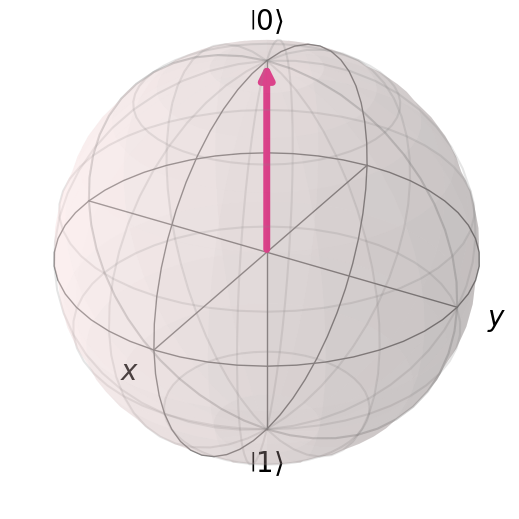

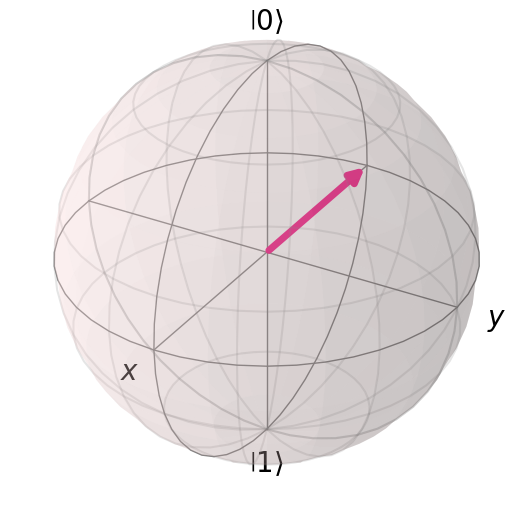

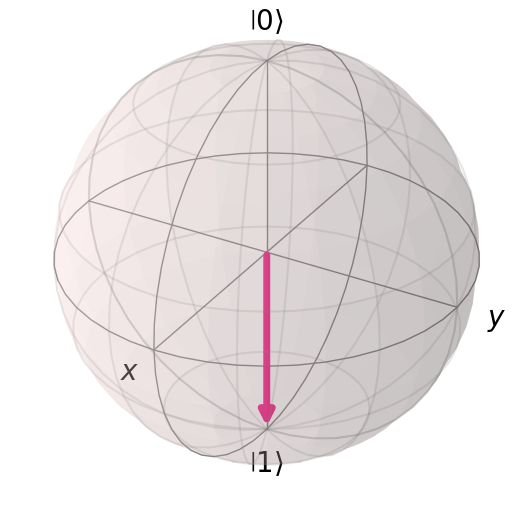

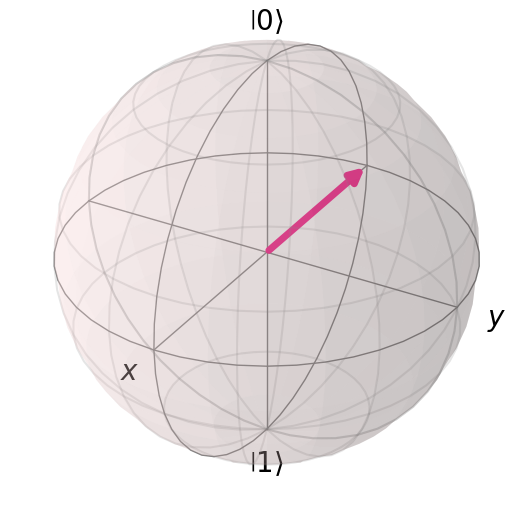

In [44]:
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt

def statevector_to_bloch_vector(state):
    """Convert a Statevector to a Bloch vector [x, y, z]."""
    rho = np.outer(state.data, np.conj(state.data))  # Density matrix
    x = 2 * np.real(rho[0, 1])
    y = 2 * np.imag(rho[1, 0])
    z = np.real(rho[0, 0] - rho[1, 1])
    return [x, y, z]

def plot_bloch_state(bit, basis, qubit_index):
    qc = QuantumCircuit(1)

    # Prepare the qubit state
    if basis == 'Z':
        if bit == 1:
            qc.x(0)
    elif basis == 'X':
        qc.h(0)
        if bit == 1:
            qc.z(0)

    # Get statevector and convert to Bloch coordinates
    state = Statevector.from_instruction(qc)
    bloch_vec = statevector_to_bloch_vector(state)

    # Plot on Bloch sphere
    bloch = Bloch()
    bloch.add_vectors(bloch_vec)
    bloch.title = f"Qubit {qubit_index+1} | Bit={bit}, Basis={basis}"
    bloch.show()

# Example: Plot first 5 qubits from Alice's data
for i in range(min(5, len(alice_bits))):
    plot_bloch_state(alice_bits[i], alice_bases[i], i)





- **Hadamard Gate (H):**
  $$
  H = \frac{1}{\sqrt{2}}
  \begin{bmatrix}
  1 & 1 \\
  1 & -1
  \end{bmatrix}
  $$

- **Pauli-X Gate (NOT):**
  $$
  X =
  \begin{bmatrix}
  0 & 1 \\
  1 & 0
  \end{bmatrix}
  $$


In [45]:
import random
import pandas as pd

# Generate random bits
def generate_random_bits(n):
    return [random.randint(0, 1) for _ in range(n)]

# Generate random bases (Z or X)
def generate_random_bases(n):
    return [random.choice(['Z', 'X']) for _ in range(n)]

# Encode qubits based on bits and bases
def encode_qubits(bits, bases):
    encoded = []
    for bit, basis in zip(bits, bases):
        if basis == 'Z':
            encoded.append('|0>' if bit == 0 else '|1>')
        else:
            encoded.append('|+>' if bit == 0 else '|->')
    return encoded

# Simulate measurement
def measure_qubits(encoded_qubits, measurement_bases):
    results = []
    for qubit, basis in zip(encoded_qubits, measurement_bases):
        if basis == 'Z':
            if qubit in ['|0>', '|+>']:
                results.append(0)
            else:
                results.append(1)
        else:
            if qubit in ['|+>', '|0>']:
                results.append(0)
            else:
                results.append(1)
    return results

# Number of bits
n_bits = 10

# Alice's data
alice_bits = generate_random_bits(n_bits)
alice_bases = generate_random_bases(n_bits)
encoded_qubits = encode_qubits(alice_bits, alice_bases)

# Bob's data
bob_bases = generate_random_bases(n_bits)
bob_results = measure_qubits(encoded_qubits, bob_bases)

# Create DataFrame
df = pd.DataFrame({
    "Alice's Bit": alice_bits,
    "Alice's Basis": alice_bases,
    "Encoded Qubit": encoded_qubits,
    "Bob's Basis": bob_bases,
    "Bob's Result": bob_results,
    "Basis Match?": ["✅" if ab == bb else "❌" for ab, bb in zip(alice_bases, bob_bases)],
    "Bit Match?": ["✅" if (ab == bb and a_bit == b_res) else "❌"
                   for a_bit, b_res, ab, bb in zip(alice_bits, bob_results, alice_bases, bob_bases)]
})

# Sifted key
sifted_key = [a_bit for a_bit, ab, bb in zip(alice_bits, alice_bases, bob_bases) if ab == bb]

# Clean table styling (no bg colors, just symbols)
def plain_style(val):
    return ""  # No styling

df_styled = df.style.map(plain_style, subset=["Basis Match?", "Bit Match?"])

# Display
display(df_styled)
print("\nSifted Key:", sifted_key)



,Alice's Bit,Alice's Basis,Encoded Qubit,Bob's Basis,Bob's Result,Basis Match?,Bit Match?
0,0,X,|+>,Z,0,❌,❌
1,0,Z,|0>,X,0,❌,❌
2,1,X,|->,Z,1,❌,❌
3,0,Z,|0>,Z,0,✅,✅
4,0,X,|+>,Z,0,❌,❌
5,1,X,|->,X,1,✅,✅
6,1,X,|->,Z,1,❌,❌
7,1,Z,|1>,Z,1,✅,✅
8,1,Z,|1>,Z,1,✅,✅
9,1,Z,|1>,X,1,❌,❌



Sifted Key: [0, 1, 1, 1]


## *Final Agreed Key (After Sifting)*
The sifted key is generated by keeping only the bits where Alice and Bob used the same basis.  
This forms the secure key for encryption.
